In [1]:
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import seaborn as sns

In [2]:
json_data = json.load(open('../Data/tmdb_resources/tmdb_actors_db.json'))
tmdb_actors = pd.json_normalize(json_data['results'], sep='_')

# The column 'known_for' is a list of dictionaries. For each row, we wish to only keep the movies known for, not the media types == tv
tmdb_actors['known_for'] = tmdb_actors['known_for'].apply(lambda x: [d for d in x if d['media_type'] == 'movie'])

tmdb_actors

,adult,gender,id,known_for_department,name,original_name,popularity,profile_path,known_for
0,False,0,3234630,Acting,Sangeeth Shobhan,Sangeeth Shobhan,226.892,/7Vox31bH7XmgPNJzMKGa4uGyjW8.jpg,"[{'adult': False, 'backdrop_path': '/jBnnkkXRZ..."
1,False,2,64,Acting,Gary Oldman,Gary Oldman,220.449,/hHP0769L7YrApkMKCOyb9cwgxBW.jpg,"[{'adult': False, 'backdrop_path': '/nMKdUUepR..."
2,False,1,3194176,Acting,Angeli Khang,Angeli Khang,199.449,/7vrTWF8PxQogF6o9ORZprYQoDOr.jpg,"[{'adult': False, 'backdrop_path': '/27bkw4o1z..."
3,False,1,1373737,Acting,Florence Pugh,Florence Pugh,176.589,/421cSReX2Fktldac8SyY2k0yLwY.jpg,"[{'adult': False, 'backdrop_path': '/aAM3cQmYG..."
4,False,2,976,Acting,Jason Statham,Jason Statham,162.466,/whNwkEQYWLFJA8ij0WyOOAD5xhQ.jpg,"[{'adult': False, 'backdrop_path': '/ysKahAEPP..."
...,...,...,...,...,...,...,...,...,...
9975,False,1,1288047,Acting,Alice Isaaz,Alice Isaaz,14.133,/yULL4NbQW3ymzB2lHcI7SVlb7dS.jpg,"[{'adult': False, 'backdrop_path': '/vzcJQORoL..."
9976,False,2,19540,Acting,Peter Cullen,Peter Cullen,14.133,/9Snf4fBUkk5MrAjqtNtgZRJYJbj.jpg,"[{'adult': False, 'backdrop_path': '/2vFuG6bWG..."
9977,False,1,18465,Acting,Mary Crosby,Mary Crosby,14.133,/xMa1A3XncRLo7i1ACUzsTUyFBqy.jpg,"[{'adult': False, 'backdrop_path': '/eCebbqmTs..."
9978,False,2,110665,Acting,Daisuke Namikawa,Daisuke Namikawa,14.131,/iw0X8oDutxaBAri3Ifga8nhdUJK.jpg,[]


In [3]:
tmdb_actors['known_for'].loc[3]

[{'adult': False,
  'backdrop_path': '/aAM3cQmYGjjLQ24m0F0RWfjKQ57.jpg',
  'id': 530385,
  'title': 'Midsommar',
  'original_language': 'en',
  'original_title': 'Midsommar',
  'overview': 'Several friends travel to Sweden to study as anthropologists a summer festival that is held every ninety years in the remote hometown of one of them. What begins as a dream vacation in a place where the sun never sets, gradually turns into a dark nightmare as the mysterious inhabitants invite them to participate in their disturbing festive activities.',
  'poster_path': '/7LEI8ulZzO5gy9Ww2NVCrKmHeDZ.jpg',
  'media_type': 'movie',
  'genre_ids': [27, 18, 9648],
  'popularity': 53.79,
  'release_date': '2019-07-03',
  'video': False,
  'vote_average': 7.162,
  'vote_count': 6313},
 {'adult': False,
  'backdrop_path': '/keIxh0wPr2Ymj0Btjh4gW7JJ89e.jpg',
  'id': 497698,
  'title': 'Black Widow',
  'original_language': 'en',
  'original_title': 'Black Widow',
  'overview': 'Natasha Romanoff, also known a

In [4]:
json_data = json.load(open('../../tmdb_id2detail.json'))
movie_detail = pd.json_normalize(json_data)


In [5]:
ids, popularities, release_dates = [], [], []

# Iterate over the JSON data
for movie_id, movie_info in json_data.items():
    # Parse the JSON string
    movie_info_dict = json.loads(movie_info)

    # Extract required information
    ids.append(movie_id)
    popularities.append(movie_info_dict.get('popularity'))
    release_dates.append(movie_info_dict.get('release_date'))

# Create a DataFrame
data = {'id': ids, 'popularity': popularities, 'release_date': release_dates}
tmdb_movie_filtered= pd.DataFrame(data)


In [6]:
tmdb_movie_filtered['id'].head()

0     10016
1    263493
2     50944
3     33592
4     43839
Name: id, dtype: object

In [7]:

tmdb_movie_filtered['release_date'] = pd.to_datetime(tmdb_movie_filtered['release_date'])
tmdb_movie_filtered= tmdb_movie_filtered[tmdb_movie_filtered['release_date'].dt.year < 2024]
k = 0.04
# Sort DataFrame by release_date
tmdb_movie_filtered = tmdb_movie_filtered.sort_values(by='release_date')


In [8]:
old_movies=tmdb_movie_filtered[tmdb_movie_filtered['release_date'].dt.year<2008]
new_movies=tmdb_movie_filtered[tmdb_movie_filtered['release_date'].dt.year>=2008]

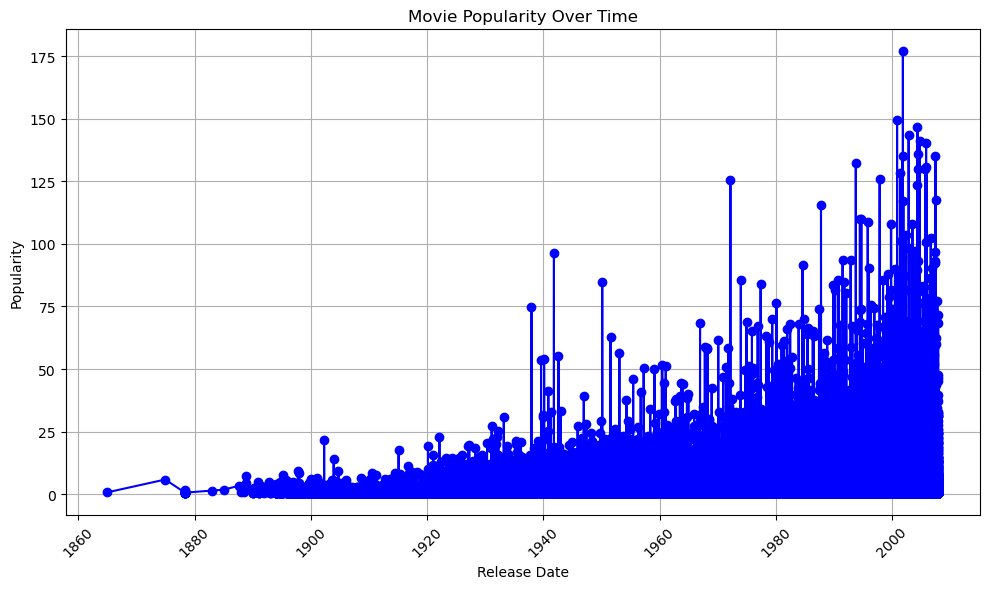

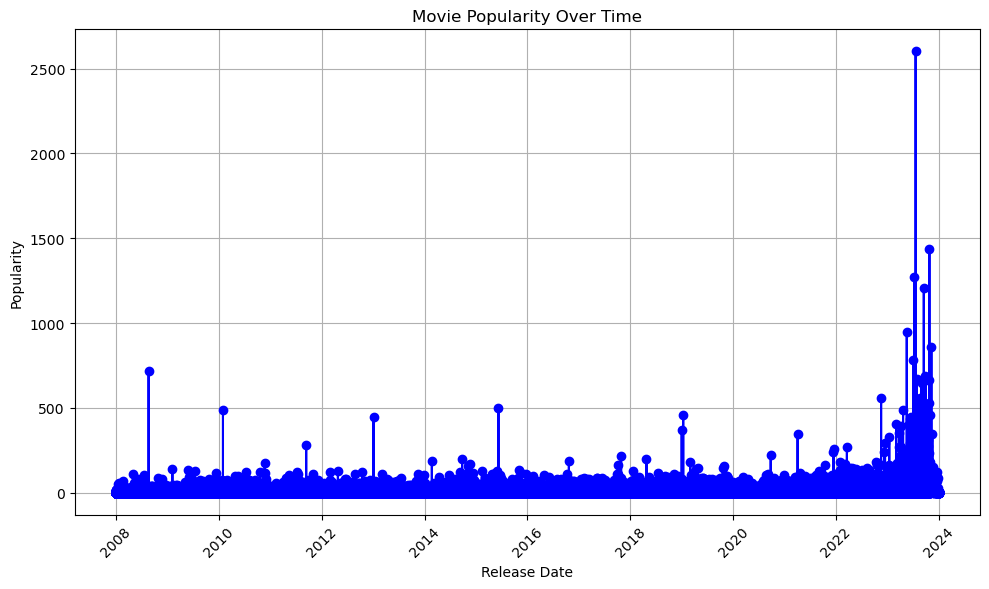

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(old_movies['release_date'], old_movies['popularity'], marker='o', linestyle='-', color='b')
plt.title('Movie Popularity Over Time')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(10, 6))
plt.plot(new_movies['release_date'], new_movies['popularity'], marker='o', linestyle='-', color='b')
plt.title('Movie Popularity Over Time')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Plot the popularity as a function of the release date

C:\Users\margu\AppData\Local\Temp\ipykernel_24112\952249067.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter_plot = sns.scatterplot(x='release_date', y='popularity', data=tmdb_movie_filtered, s=30, palette='colorblind', edgecolor='blue')


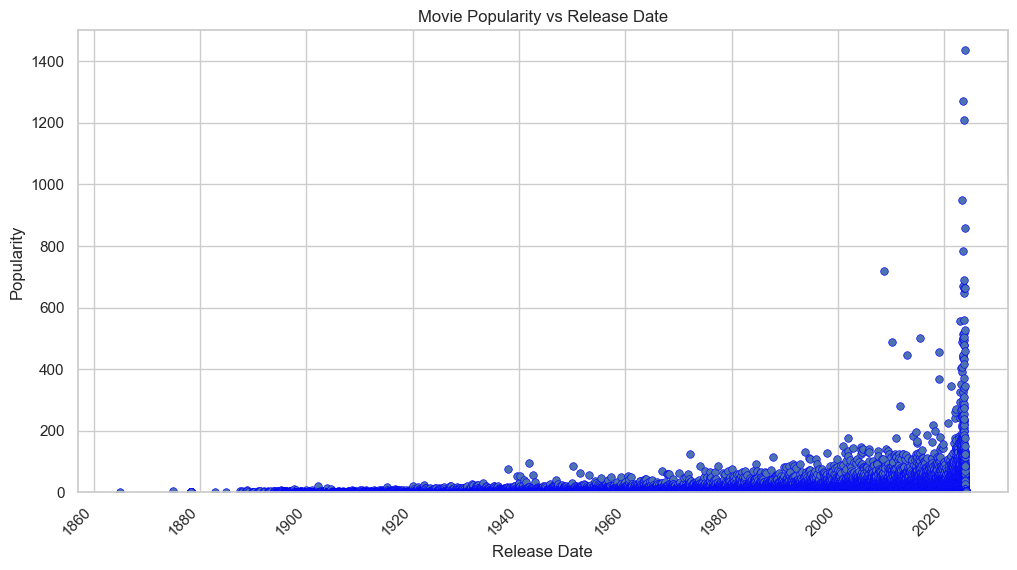

In [13]:

# exp_values = np.exp(k * (tmdb_movie_filtered['release_date'].dt.year-tmdb_movie_filtered['release_date'].dt.year.min()))


# plt.figure(figsize=(10, 6))
# plt.scatter(tmdb_movie_filtered['release_date'], tmdb_movie_filtered['popularity'], marker='o', color='b')
# #plt.scatter(movie_release_date, actor_pop, color='b', marker='o')
# plt.title('Movie Popularity Over Time')
# plt.xlabel('Release Date')
# plt.ylabel('Popularity')
# plt.ylim(0, 1500)
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(x='release_date', y='popularity', data=tmdb_movie_filtered, s=30, palette='colorblind', edgecolor='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Movie Popularity vs Release Date')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.ylim(0, 1500)

plt.show()
# plt.plot(tmdb_movie_filtered['release_date'], exp_values, marker='o', linestyle='-', color='r')
# plt.title('Exponential Function of Release Date')
# plt.xlabel('Release Date')
# plt.ylabel('Exp(k * Release Date)')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()

#plt.show()

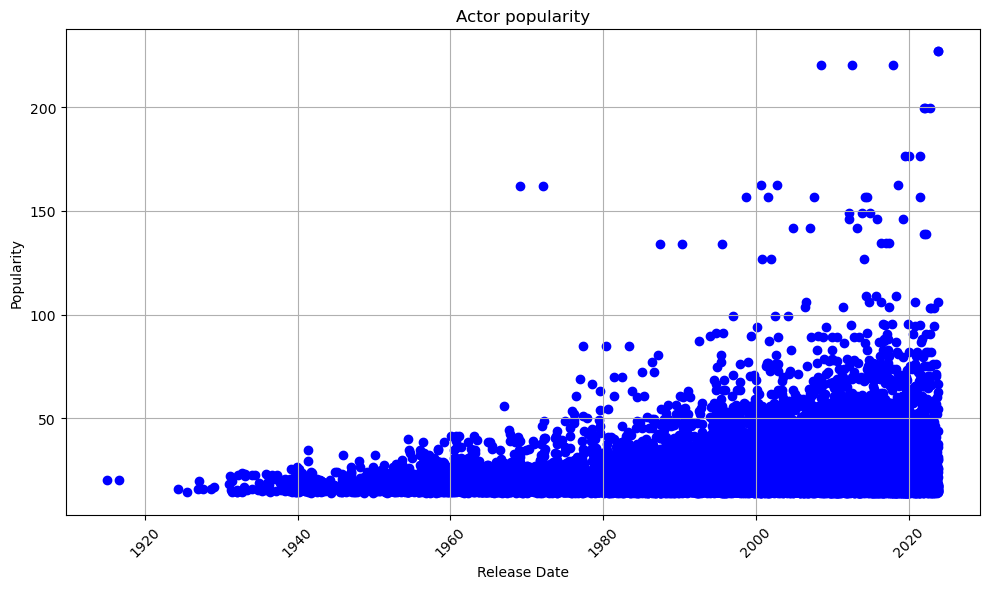

In [150]:
movie_release_date = []
actor_pop = []

for i in tmdb_actors.index:
    n_movies = len(tmdb_actors['known_for'].loc[i])
    dates = pd.to_datetime([movie['release_date'] for movie in tmdb_actors['known_for'].loc[i]][:n_movies])
    movie_release_date.extend(dates)  # Flatten the list of dates
    actor_pop.extend(np.full(n_movies, tmdb_actors['popularity'].iloc[i]))  # Use np.full to repeat the popularity value

plt.figure(figsize=(10, 6))
plt.scatter(movie_release_date, actor_pop, color='b', marker='o')
plt.title('Actor popularity')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\margu\AppData\Local\Temp\ipykernel_9276\3987529267.py:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter_plot = sns.scatterplot(x='recent release', y='popularity', data=popdf, s=30, palette='colorblind')


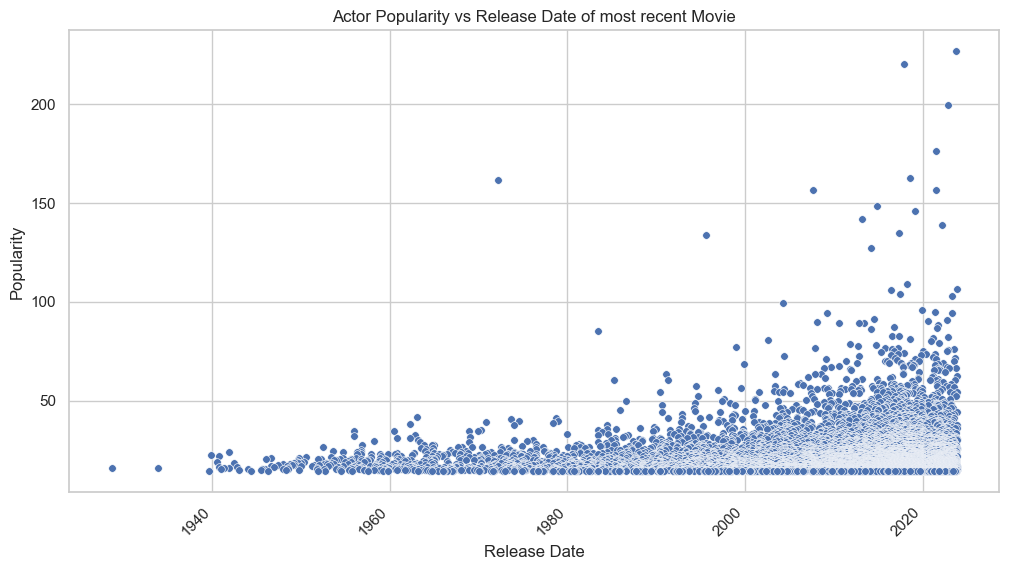

In [45]:
import matplotlib.dates as mdates
movie_release_date = []
actor_pop = []
popdf = pd.DataFrame()

for i in tmdb_actors.index:
    #n_movies = len(tmdb_actors['known_for'].loc[i])
    date = pd.to_datetime([movie['release_date'] for movie in tmdb_actors['known_for'].loc[i]]).max()
    movie_release_date.append(date)  # Flatten the list of dates
    actor_pop.append(tmdb_actors['popularity'].iloc[i])  # Use np.full to repeat the popularity value

popdf["recent release"]= movie_release_date
popdf["popularity"]=actor_pop

sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(x='recent release', y='popularity', data=popdf, s=30, palette='colorblind')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set plot title and labels
plt.title('Actor Popularity vs Release Date of most recent Movie')
plt.xlabel('Release Date')
plt.ylabel('Popularity')

# Show the plot
plt.show()


ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2023-10-13 00:00:00'), Timestamp('2017-11-22 00:00:00'),
       Timestamp('2022-10-28 00:00:00'), ...,
       Timestamp('2005-10-24 00:00:00'), NaT,
       Timestamp('2006-07-20 00:00:00')], dtype=object)

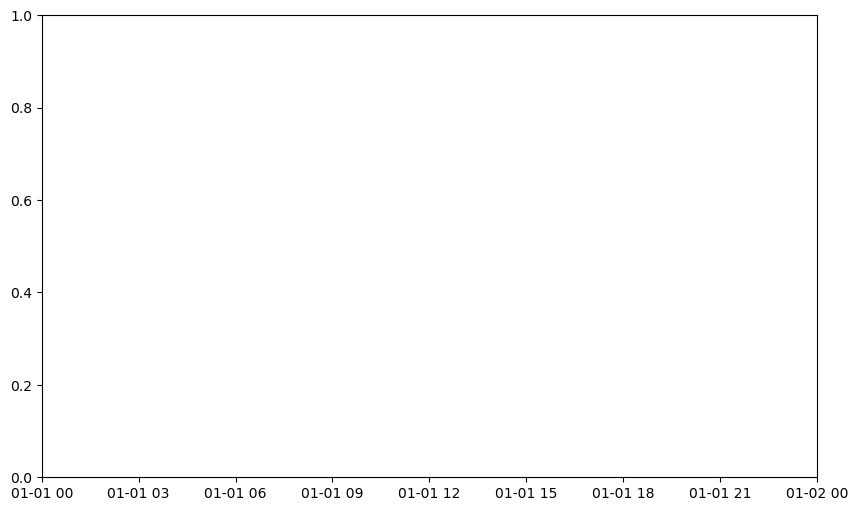

In [39]:
#print(mdates.date2num(movie_release_date))
plt.figure(figsize=(10, 6))
plt.scatter( np.array(movie_release_date), np.array(actor_pop), color='b', marker='o')
plt.title('Actor popularity')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
#plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (9980,) + inhomogeneous part.

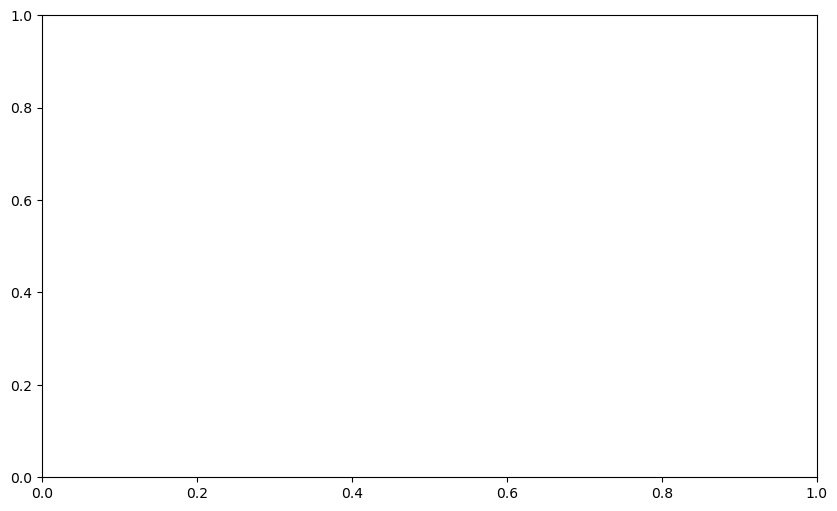

In [144]:

plt.figure(figsize=(10, 6))
plt.plot(movie_release_date, actor_pop, marker='o', linestyle='-', color='b')
plt.title('Movie Popularity Over Time')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()



In [87]:
from dateutil.relativedelta import relativedelta

months_difference = relativedelta(pd.Timestamp.now(), pd.to_datetime("2022-01-01")).months
print(months_difference)

11


In [95]:
release_dates = tmdb_movie_filtered['release_date']
movie_popularities = tmdb_movie_filtered['popularity']
alpha=0.1



months_since_release = []
fame = []

for release_date, popularity in zip(release_dates, movie_popularities):
    days_since_release=
    months_since_release.append(relativedelta(pd.Timestamp.now(), release_date).days)
    if (1 + alpha * months_since_release[-1] != 0):

        fame.append(popularity / (1 + alpha * months_since_release[-1]))


plt.figure(figsize=(10, 6))
plt.plot(months_since_release,fame , marker='o', linestyle='-', color='b')
plt.title('Movie Popularity')
plt.xlabel('Months since release date')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

TypeError: 'int' object is not subscriptable

In [54]:
def exponential_curve(x, a, b, c):
    return a * np.exp(b * x) + c

In [71]:
release_dates = old_movies['release_date']
popularity = old_movies['popularity']

# Convert release dates to numerical values for fitting
days_since_release = (release_dates - release_dates.min()).dt.days

# Fit the exponential curve
params, covariance = curve_fit(exponential_curve, days_since_release, popularity)

# Generate values for the fitted curve
fit_values = exponential_curve(days_since_release, *params)

# Plot the data and the fitted curve
plt.scatter(days_since_release, popularity, label='Actual Data')
plt.plot(days_since_release, fit_values, 'r-', label='Exponential Fit')
plt.xlabel('Days Since Release')
plt.ylabel('Popularity')
plt.legend()
plt.show()

c:\Users\margu\anaconda3\envs\ada\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.